# ***Apple Quality Classifier***



# **Importing Libraries**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,MaxPool2D
from keras.layers import GlobalAveragePooling2D,Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [6]:
import pickle
import random

In [7]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [9]:
e=150
neurons=2048

# **Loading dataset**

In [10]:
class ImagesToDataset(object):

    def __init__(self,PATH='', IMAGE_SIZE = 300):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def Process_Image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                try:
                  for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path)
                        image_data_temp=cv2.cvtColor(image_data_temp,cv2.COLOR_BGR2RGB)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE),interpolation=cv2.INTER_CUBIC)
                        # image_hist=cv2.calcHist([image_temp_resize],[0,1,2],None,[32,32,32],[0,256,0,256,0,256])
                        # cv2.normalize(image_hist,image_hist)
                       # hist_flatten=image_hist.flatten()
                        #image_flatten=image_temp_resize.flatten()
                        #print(image_temp_resize)
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        print("error in resizing")
                except:
                    print("error in loop")

            data = np.asanyarray(self.image_data,dtype=object)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1]) 
                # self.features.append(x[2])       # get the label

            X_Data = np.asarray(self.x_data,dtype='float32') / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)
            # Features=np.asarray(self.features)

            # reshape x_Data

            #X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data #, Features
        except:
            print("Failed to run Function Process Image ")
            return 0,0
            

    def pickle_image(self,name="train"):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.Process_Image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('/content/drive/MyDrive/X_Data_nn_'+name,'wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('/content/drive/MyDrive/Y_Data_nn_'+name, 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        # pickle_out = open('Features'+name, 'wb')
        # pickle.dump(Features, pickle_out)
        # pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data #,Features

    def load_dataset(self,name="train"):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('/content/drive/MyDrive/X_Data_nn_'+name,'rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('/content/drive/MyDrive/Y_Data_nn_'+name,'rb')
            Y_Data = pickle.load(Y_Temp)

            # Features_Temp = open('Features'+name,'rb')
            # Features = pickle.load(Features_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data #,Features

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data= self.pickle_image(name)
            return X_Data,Y_Data


In [11]:
data_set=ImagesToDataset(PATH="/content/drive/MyDrive/dataset3")


In [12]:
x_data,y_data=data_set.load_dataset("dataset3")

Reading Dataset from PIckle Object


In [13]:
len(y_data)

5600

# **Spliting dataset**

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3, random_state=42)

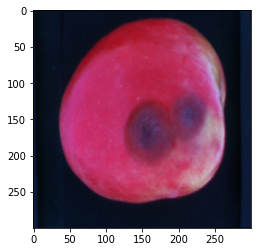

In [15]:
plt.imshow(x_train[100])

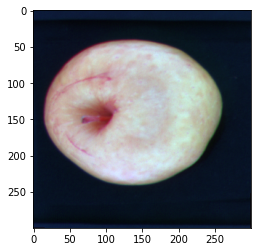

In [16]:
plt.imshow(x_test[10])

In [17]:
len(x_train)

3920

In [18]:
len(y_train)

3920

**Converting y data to categorical**

---



In [19]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [20]:
y_train_cat[70:91]

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

# **VGG16**

**Using neural network with relu activation function**

---



In [68]:
from keras.applications.vgg16 import VGG16

In [69]:

conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(300,300,3))
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(neurons,activation='relu'))
#model.add(Dense(4096,activation='relu'))
model.add(Dense(5,activation='softmax'))
conv_base.trainable=False

In [70]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [71]:
history=model.fit(x_train,y_train_cat,epochs=e,validation_split=0.2)

Epoch 1/150
98/98 [==============================] - 6s 52ms/step - loss: 5.2858 - accuracy: 0.4608 - val_loss: 1.1075 - val_accuracy: 0.5855
Epoch 2/150
98/98 [==============================] - 4s 44ms/step - loss: 0.7942 - accuracy: 0.6952 - val_loss: 1.0456 - val_accuracy: 0.5880
Epoch 3/150
98/98 [==============================] - 4s 44ms/step - loss: 0.4444 - accuracy: 0.8438 - val_loss: 0.7039 - val_accuracy: 0.7462
Epoch 4/150
98/98 [==============================] - 4s 44ms/step - loss: 0.3732 - accuracy: 0.8654 - val_loss: 0.6653 - val_accuracy: 0.7360
Epoch 5/150
98/98 [==============================] - 4s 44ms/step - loss: 0.2176 - accuracy: 0.9337 - val_loss: 0.6084 - val_accuracy: 0.7730
Epoch 6/150
98/98 [==============================] - 4s 44ms/step - loss: 0.1582 - accuracy: 0.9595 - val_loss: 0.4636 - val_accuracy: 0.8189
Epoch 7/150
98/98 [==============================] - 4s 45ms/step - loss: 0.1085 - accuracy: 0.9729 - val_loss: 0.5172 - val_accuracy: 0.8151
Epoch 

In [72]:
y_pred=model.predict(x_test)

53/53 [==============================] - 2s 31ms/step


In [73]:
y_pred2=np.argmax(y_pred, axis=1)
y_test2=np.argmax(y_test_cat, axis=1)
cm=confusion_matrix(y_test2,y_pred2)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       311
           1       0.90      0.91      0.90       331
           2       0.83      0.80      0.81       343
           3       0.83      0.82      0.83       357
           4       0.89      0.88      0.88       338

    accuracy                           0.86      1680
   macro avg       0.86      0.86      0.86      1680
weighted avg       0.86      0.86      0.86      1680



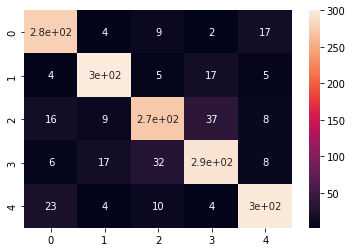

In [74]:
sns.heatmap(cm,annot=True)
print(classification_report(y_test2,y_pred2))

**Using neural network with sigmoid activation function**

---



In [75]:

conv_base2=VGG16(weights='imagenet',include_top=False,input_shape=(300,300,3))
model2=Sequential()
model2.add(conv_base2)
model2.add(Flatten())
model2.add(Dense(neurons,activation='sigmoid'))
#model2.add(Dense(4096,activation='relu'))
model2.add(Dense(5,activation='softmax'))
conv_base2.trainable=False

In [76]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [77]:
history2=model2.fit(x_train,y_train_cat,epochs=e,validation_split=0.2)

Epoch 1/150
98/98 [==============================] - 6s 53ms/step - loss: 2.6583 - accuracy: 0.2647 - val_loss: 1.5753 - val_accuracy: 0.3099
Epoch 2/150
98/98 [==============================] - 4s 45ms/step - loss: 1.4376 - accuracy: 0.3779 - val_loss: 1.4703 - val_accuracy: 0.3584
Epoch 3/150
98/98 [==============================] - 4s 45ms/step - loss: 1.3453 - accuracy: 0.4225 - val_loss: 1.2959 - val_accuracy: 0.3954
Epoch 4/150
98/98 [==============================] - 4s 45ms/step - loss: 1.2191 - accuracy: 0.5096 - val_loss: 1.1942 - val_accuracy: 0.4528
Epoch 5/150
98/98 [==============================] - 4s 45ms/step - loss: 1.1125 - accuracy: 0.5478 - val_loss: 1.1119 - val_accuracy: 0.5867
Epoch 6/150
98/98 [==============================] - 4s 44ms/step - loss: 1.0224 - accuracy: 0.6087 - val_loss: 1.0491 - val_accuracy: 0.5893
Epoch 7/150
98/98 [==============================] - 4s 45ms/step - loss: 0.9083 - accuracy: 0.6881 - val_loss: 1.0529 - val_accuracy: 0.6199
Epoch 

In [78]:
y_pred2=model2.predict(x_test)

53/53 [==============================] - 2s 31ms/step


In [79]:
y_pred22=np.argmax(y_pred2, axis=1)
y_test22=np.argmax(y_test_cat, axis=1)
cm=confusion_matrix(y_test22,y_pred22)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       311
           1       0.73      0.95      0.83       331
           2       0.76      0.72      0.74       343
           3       0.81      0.63      0.71       357
           4       0.83      0.87      0.85       338

    accuracy                           0.79      1680
   macro avg       0.80      0.79      0.79      1680
weighted avg       0.80      0.79      0.79      1680



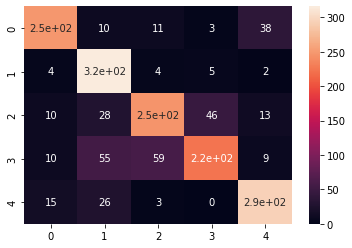

In [80]:
sns.heatmap(cm,annot=True)
print(classification_report(y_test22,y_pred22))

**Using neural network with tanh activation function**

---



In [81]:

conv_base3=VGG16(weights='imagenet',include_top=False,input_shape=(300,300,3))
model3=Sequential()
model3.add(conv_base3)
model3.add(Flatten())
model3.add(Dense(neurons,activation='tanh'))
#model3.add(Dense(4098,activation='relu'))
model3.add(Dense(5,activation='softmax'))
conv_base3.trainable=False

In [82]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [83]:
history3=model3.fit(x_train,y_train_cat,epochs=e,validation_split=0.2)

Epoch 1/150
98/98 [==============================] - 6s 52ms/step - loss: 3.9782 - accuracy: 0.2216 - val_loss: 1.6824 - val_accuracy: 0.1862
Epoch 2/150
98/98 [==============================] - 4s 45ms/step - loss: 1.6144 - accuracy: 0.2739 - val_loss: 1.5964 - val_accuracy: 0.2538
Epoch 3/150
98/98 [==============================] - 4s 44ms/step - loss: 1.5534 - accuracy: 0.2915 - val_loss: 1.3905 - val_accuracy: 0.4324
Epoch 4/150
98/98 [==============================] - 4s 44ms/step - loss: 1.4260 - accuracy: 0.3667 - val_loss: 1.4791 - val_accuracy: 0.3087
Epoch 5/150
98/98 [==============================] - 4s 44ms/step - loss: 1.3982 - accuracy: 0.3842 - val_loss: 1.4499 - val_accuracy: 0.3278
Epoch 6/150
98/98 [==============================] - 4s 44ms/step - loss: 1.3355 - accuracy: 0.4123 - val_loss: 1.3479 - val_accuracy: 0.4515
Epoch 7/150
98/98 [==============================] - 4s 45ms/step - loss: 1.3256 - accuracy: 0.4193 - val_loss: 1.2900 - val_accuracy: 0.4311
Epoch 

In [84]:
y_pred3=model3.predict(x_test)

53/53 [==============================] - 2s 31ms/step


In [85]:
y_pred23=np.argmax(y_pred3, axis=1)
y_test23=np.argmax(y_test_cat, axis=1)
cm=confusion_matrix(y_test23,y_pred23)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       311
           1       0.98      0.71      0.83       331
           2       0.75      0.70      0.72       343
           3       0.69      0.80      0.74       357
           4       0.79      0.88      0.83       338

    accuracy                           0.79      1680
   macro avg       0.81      0.79      0.79      1680
weighted avg       0.81      0.79      0.79      1680



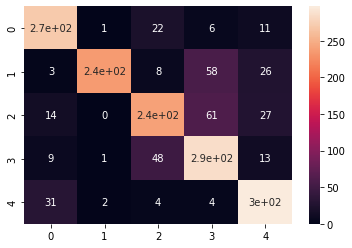

In [86]:
sns.heatmap(cm,annot=True)
print(classification_report(y_test23,y_pred23))

**Using linear activation function**

---



In [87]:

conv_base33=VGG16(weights='imagenet',include_top=False,input_shape=(300,300,3))
model33=Sequential()
model33.add(conv_base33)
model33.add(Flatten())
model33.add(Dense(neurons,activation='linear'))
#model33.add(Dense(4098,activation='relu'))
model33.add(Dense(5,activation='softmax'))
conv_base33.trainable=False

In [88]:
model33.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [89]:
history33=model33.fit(x_train,y_train_cat,epochs=e,validation_split=0.2)

Epoch 1/150
98/98 [==============================] - 6s 52ms/step - loss: 25.9462 - accuracy: 0.4649 - val_loss: 3.9852 - val_accuracy: 0.6135
Epoch 2/150
98/98 [==============================] - 4s 44ms/step - loss: 3.1430 - accuracy: 0.6744 - val_loss: 4.9349 - val_accuracy: 0.5765
Epoch 3/150
98/98 [==============================] - 4s 44ms/step - loss: 0.9744 - accuracy: 0.8262 - val_loss: 3.0877 - val_accuracy: 0.6352
Epoch 4/150
98/98 [==============================] - 4s 44ms/step - loss: 0.5685 - accuracy: 0.8724 - val_loss: 1.1219 - val_accuracy: 0.7895
Epoch 5/150
98/98 [==============================] - 4s 45ms/step - loss: 0.1563 - accuracy: 0.9464 - val_loss: 1.1037 - val_accuracy: 0.7844
Epoch 6/150
98/98 [==============================] - 4s 44ms/step - loss: 0.2554 - accuracy: 0.9232 - val_loss: 1.0277 - val_accuracy: 0.7857
Epoch 7/150
98/98 [==============================] - 4s 44ms/step - loss: 0.0987 - accuracy: 0.9700 - val_loss: 1.0742 - val_accuracy: 0.7781
Epoch

53/53 [==============================] - 2s 32ms/step
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       311
           1       0.91      0.91      0.91       331
           2       0.84      0.81      0.83       343
           3       0.83      0.82      0.83       357
           4       0.88      0.86      0.87       338

    accuracy                           0.86      1680
   macro avg       0.86      0.86      0.86      1680
weighted avg       0.86      0.86      0.86      1680



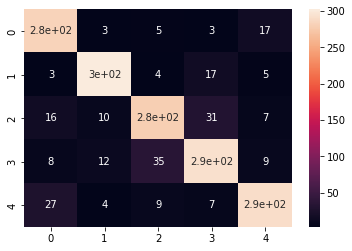

In [90]:
y_pred33=model33.predict(x_test)
y_pred233=np.argmax(y_pred33, axis=1)
y_test233=np.argmax(y_test_cat, axis=1)
cm=confusion_matrix(y_test233,y_pred233)
sns.heatmap(cm,annot=True)
print(classification_report(y_test233,y_pred233))

**Finding image embedding**

---



In [92]:
conv_base_1=VGG16(weights='imagenet',include_top=False,input_shape=(300,300,3))
model_1=Sequential()
model_1.add(conv_base_1)
model_1.add(Flatten())
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

x_train_1=model_1.predict(x_train)
x_test_1=model_1.predict(x_test)

pickle_out = open('/content/drive/MyDrive/x_train_1', 'wb')
pickle.dump(x_train_1, pickle_out)
pickle_out.close()

pickle_out = open('/content/drive/MyDrive/x_test_1', 'wb')
pickle.dump(x_test_1, pickle_out)
pickle_out.close()

53/53 [==============================] - 2s 31ms/step


# **VGG19**

**Using neural network with relu activation function**

---



In [21]:
from keras.applications.vgg19 import VGG19

In [93]:

conv_base4=VGG19(weights='imagenet',include_top=False,input_shape=(300,300,3))
model4=Sequential()
model4.add(conv_base4)
model4.add(Flatten())
model4.add(Dense(neurons,activation='relu'))
#model4.add(Dense(4096,activation='relu'))
model4.add(Dense(5,activation='softmax'))
conv_base4.trainable=False

In [94]:
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [95]:
history4=model4.fit(x_train,y_train_cat,epochs=e,validation_split=0.2)

Epoch 1/150
98/98 [==============================] - 7s 60ms/step - loss: 4.9392 - accuracy: 0.4308 - val_loss: 1.1195 - val_accuracy: 0.5638
Epoch 2/150
98/98 [==============================] - 5s 51ms/step - loss: 0.8154 - accuracy: 0.6913 - val_loss: 1.3130 - val_accuracy: 0.5765
Epoch 3/150
98/98 [==============================] - 5s 51ms/step - loss: 0.5507 - accuracy: 0.7892 - val_loss: 1.0329 - val_accuracy: 0.6288
Epoch 4/150
98/98 [==============================] - 5s 51ms/step - loss: 0.4708 - accuracy: 0.8256 - val_loss: 0.9680 - val_accuracy: 0.6454
Epoch 5/150
98/98 [==============================] - 5s 51ms/step - loss: 0.4063 - accuracy: 0.8571 - val_loss: 0.8674 - val_accuracy: 0.7079
Epoch 6/150
98/98 [==============================] - 5s 50ms/step - loss: 0.3028 - accuracy: 0.8941 - val_loss: 0.5796 - val_accuracy: 0.7819
Epoch 7/150
98/98 [==============================] - 5s 51ms/step - loss: 0.1614 - accuracy: 0.9544 - val_loss: 0.6625 - val_accuracy: 0.7615
Epoch 

53/53 [==============================] - 2s 36ms/step
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       311
           1       0.92      0.89      0.91       331
           2       0.77      0.79      0.78       343
           3       0.82      0.77      0.79       357
           4       0.86      0.88      0.87       338

    accuracy                           0.84      1680
   macro avg       0.84      0.84      0.84      1680
weighted avg       0.84      0.84      0.84      1680



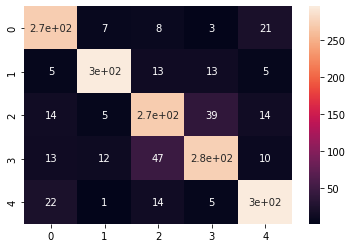

In [96]:
y_pred4=model4.predict(x_test)
y_pred24=np.argmax(y_pred4, axis=1)
y_test24=np.argmax(y_test_cat, axis=1)
cm=confusion_matrix(y_test24,y_pred24)
sns.heatmap(cm,annot=True)
print(classification_report(y_test24,y_pred24))

**Using neural network with sigmoid activation function**

---



In [22]:
conv_base5=VGG19(weights='imagenet',include_top=False,input_shape=(300,300,3))
model5=Sequential()
model5.add(conv_base5)
model5.add(Flatten())
model5.add(Dense(neurons,activation='sigmoid'))
#model5.add(Dense(neurons,activation='relu'))
model5.add(Dense(5,activation='softmax'))
conv_base5.trainable=False

80134624/80134624 [==============================] - 5s 0us/step


In [23]:
model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
history5=model5.fit(x_train,y_train_cat,epochs=e,validation_split=0.2)

Epoch 1/150
98/98 [==============================] - 17s 68ms/step - loss: 3.6338 - accuracy: 0.2347 - val_loss: 1.6312 - val_accuracy: 0.1862
Epoch 2/150
98/98 [==============================] - 5s 49ms/step - loss: 1.5775 - accuracy: 0.2685 - val_loss: 1.5461 - val_accuracy: 0.3635
Epoch 3/150
98/98 [==============================] - 5s 50ms/step - loss: 1.5089 - accuracy: 0.3342 - val_loss: 1.5837 - val_accuracy: 0.3393
Epoch 4/150
98/98 [==============================] - 5s 50ms/step - loss: 1.4630 - accuracy: 0.3731 - val_loss: 1.4709 - val_accuracy: 0.1862
Epoch 5/150
98/98 [==============================] - 5s 51ms/step - loss: 1.3838 - accuracy: 0.4056 - val_loss: 1.3997 - val_accuracy: 0.3278
Epoch 6/150
98/98 [==============================] - 5s 50ms/step - loss: 1.3472 - accuracy: 0.4123 - val_loss: 1.2885 - val_accuracy: 0.3724
Epoch 7/150
98/98 [==============================] - 5s 50ms/step - loss: 1.2742 - accuracy: 0.4592 - val_loss: 1.2429 - val_accuracy: 0.4196
Epoch

53/53 [==============================] - 2s 38ms/step
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       311
           1       0.87      0.86      0.87       331
           2       0.72      0.74      0.73       343
           3       0.77      0.76      0.76       357
           4       0.86      0.81      0.84       338

    accuracy                           0.80      1680
   macro avg       0.80      0.80      0.80      1680
weighted avg       0.80      0.80      0.80      1680



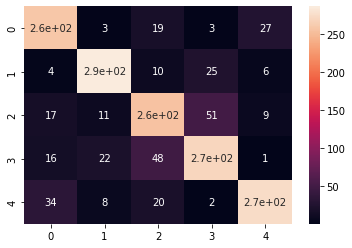

In [25]:
y_pred5=model5.predict(x_test)
y_pred25=np.argmax(y_pred5, axis=1)
y_test25=np.argmax(y_test_cat, axis=1)
cm=confusion_matrix(y_test25,y_pred25)
sns.heatmap(cm,annot=True)
print(classification_report(y_test25,y_pred25))

**Using neural network with tanh activation function**

---



In [26]:
conv_base6=VGG19(weights='imagenet',include_top=False,input_shape=(300,300,3))
model6=Sequential()
model6.add(conv_base6)
model6.add(Flatten())
model6.add(Dense(neurons,activation='tanh'))
#model6.add(Dense(4096,activation='relu'))
model6.add(Dense(5,activation='softmax'))
conv_base6.trainable=False

In [27]:
model6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
history6=model6.fit(x_train,y_train_cat,epochs=e,validation_split=0.2)

Epoch 1/150
98/98 [==============================] - 7s 63ms/step - loss: 4.8009 - accuracy: 0.2108 - val_loss: 1.7108 - val_accuracy: 0.1862
Epoch 2/150
98/98 [==============================] - 5s 50ms/step - loss: 1.6698 - accuracy: 0.2009 - val_loss: 1.6361 - val_accuracy: 0.2079
Epoch 3/150
98/98 [==============================] - 5s 51ms/step - loss: 1.7038 - accuracy: 0.1964 - val_loss: 1.7674 - val_accuracy: 0.2079
Epoch 4/150
98/98 [==============================] - 5s 50ms/step - loss: 1.7090 - accuracy: 0.1977 - val_loss: 1.6182 - val_accuracy: 0.2092
Epoch 5/150
98/98 [==============================] - 5s 50ms/step - loss: 1.6944 - accuracy: 0.1888 - val_loss: 1.8472 - val_accuracy: 0.1990
Epoch 6/150
98/98 [==============================] - 5s 50ms/step - loss: 1.7388 - accuracy: 0.1961 - val_loss: 1.6973 - val_accuracy: 0.2092
Epoch 7/150
98/98 [==============================] - 5s 50ms/step - loss: 1.7018 - accuracy: 0.1990 - val_loss: 1.7708 - val_accuracy: 0.2079
Epoch 

53/53 [==============================] - 2s 36ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       311
           1       0.20      1.00      0.33       331
           2       0.00      0.00      0.00       343
           3       0.00      0.00      0.00       357
           4       0.00      0.00      0.00       338

    accuracy                           0.20      1680
   macro avg       0.04      0.20      0.07      1680
weighted avg       0.04      0.20      0.06      1680



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


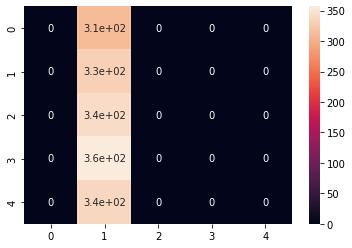

In [29]:
y_pred6=model6.predict(x_test)
y_pred26=np.argmax(y_pred6, axis=1)
y_test26=np.argmax(y_test_cat, axis=1)
cm=confusion_matrix(y_test26,y_pred26)
sns.heatmap(cm,annot=True)
print(classification_report(y_test26,y_pred26))

**Using neural network with linear activation function**

---



In [30]:
conv_base63=VGG19(weights='imagenet',include_top=False,input_shape=(300,300,3))
model63=Sequential()
model63.add(conv_base63)
model63.add(Flatten())
model63.add(Dense(neurons,activation='linear'))
#model63.add(Dense(4096,activation='relu'))
model63.add(Dense(5,activation='softmax'))
conv_base63.trainable=False

In [31]:
model63.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
history63=model63.fit(x_train,y_train_cat,epochs=e,validation_split=0.2)

Epoch 1/150
98/98 [==============================] - 7s 58ms/step - loss: 32.3385 - accuracy: 0.4206 - val_loss: 19.6919 - val_accuracy: 0.4452
Epoch 2/150
98/98 [==============================] - 5s 50ms/step - loss: 5.7375 - accuracy: 0.6119 - val_loss: 5.6832 - val_accuracy: 0.6097
Epoch 3/150
98/98 [==============================] - 5s 50ms/step - loss: 2.4540 - accuracy: 0.7127 - val_loss: 8.0058 - val_accuracy: 0.4503
Epoch 4/150
98/98 [==============================] - 5s 50ms/step - loss: 1.1834 - accuracy: 0.8055 - val_loss: 1.8214 - val_accuracy: 0.6977
Epoch 5/150
98/98 [==============================] - 5s 50ms/step - loss: 0.3704 - accuracy: 0.9034 - val_loss: 2.1574 - val_accuracy: 0.6696
Epoch 6/150
98/98 [==============================] - 5s 51ms/step - loss: 0.6747 - accuracy: 0.8648 - val_loss: 1.1414 - val_accuracy: 0.7487
Epoch 7/150
98/98 [==============================] - 5s 50ms/step - loss: 0.3062 - accuracy: 0.9155 - val_loss: 1.0301 - val_accuracy: 0.7640
Epoc

53/53 [==============================] - 2s 36ms/step
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       311
           1       0.91      0.87      0.89       331
           2       0.75      0.78      0.77       343
           3       0.80      0.76      0.78       357
           4       0.85      0.87      0.86       338

    accuracy                           0.83      1680
   macro avg       0.83      0.83      0.83      1680
weighted avg       0.83      0.83      0.83      1680



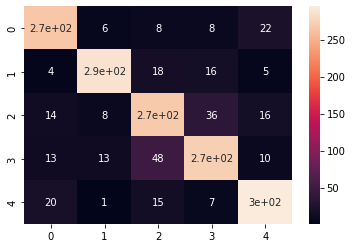

In [33]:
y_pred63=model63.predict(x_test)
y_pred263=np.argmax(y_pred63, axis=1)
y_test263=np.argmax(y_test_cat, axis=1)
cm=confusion_matrix(y_test263,y_pred263)
sns.heatmap(cm,annot=True)
print(classification_report(y_test263,y_pred263))

In [34]:
conv_base_2=VGG19(weights='imagenet',include_top=False,input_shape=(300,300,3))
model_2=Sequential()
model_2.add(conv_base_2)
model_2.add(Flatten())
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

x_train_2=model_2.predict(x_train)
x_test_2=model_2.predict(x_test)

pickle_out = open('/content/drive/MyDrive/x_train_2', 'wb')
pickle.dump(x_train_2, pickle_out)
pickle_out.close()

pickle_out = open('/content/drive/MyDrive/x_test_2', 'wb')
pickle.dump(x_test_2, pickle_out)
pickle_out.close()

53/53 [==============================] - 2s 36ms/step


# ***Inception V3***

**Using neural network with relu activation function**

---



In [35]:
from keras.applications import InceptionV3
conv_base7=InceptionV3(weights='imagenet',include_top=False,input_shape=(300,300,3))
model7=Sequential()
model7.add(conv_base7)
model7.add(GlobalAveragePooling2D())
model7.add(Dense(neurons,activation='relu'))
#model7.add(Dense(4096,activation='relu'))
model7.add(Dense(5,activation='softmax'))
conv_base7.trainable=False

87910968/87910968 [==============================] - 5s 0us/step


In [36]:
model7.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
history7=model7.fit(x_train,y_train_cat,epochs=e,validation_split=0.2)

Epoch 1/150
98/98 [==============================] - 12s 63ms/step - loss: 1.2748 - accuracy: 0.5714 - val_loss: 0.7834 - val_accuracy: 0.7117
Epoch 2/150
98/98 [==============================] - 3s 35ms/step - loss: 0.6963 - accuracy: 0.7181 - val_loss: 0.6480 - val_accuracy: 0.7474
Epoch 3/150
98/98 [==============================] - 3s 35ms/step - loss: 0.5733 - accuracy: 0.7758 - val_loss: 0.5914 - val_accuracy: 0.7768
Epoch 4/150
98/98 [==============================] - 3s 35ms/step - loss: 0.5228 - accuracy: 0.7940 - val_loss: 0.5864 - val_accuracy: 0.7653
Epoch 5/150
98/98 [==============================] - 4s 37ms/step - loss: 0.3983 - accuracy: 0.8482 - val_loss: 0.6673 - val_accuracy: 0.7334
Epoch 6/150
98/98 [==============================] - 3s 36ms/step - loss: 0.3359 - accuracy: 0.8804 - val_loss: 0.4952 - val_accuracy: 0.7934
Epoch 7/150
98/98 [==============================] - 3s 35ms/step - loss: 0.2961 - accuracy: 0.8973 - val_loss: 0.5808 - val_accuracy: 0.7666
Epoch

53/53 [==============================] - 3s 26ms/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       311
           1       0.94      0.95      0.95       331
           2       0.95      0.90      0.93       343
           3       0.93      0.92      0.92       357
           4       0.93      0.93      0.93       338

    accuracy                           0.93      1680
   macro avg       0.93      0.93      0.93      1680
weighted avg       0.93      0.93      0.93      1680



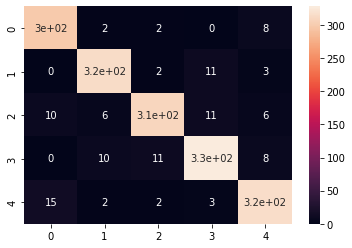

In [38]:
y_pred7=model7.predict(x_test)
y_pred27=np.argmax(y_pred7, axis=1)
y_test27=np.argmax(y_test_cat, axis=1)
cm=confusion_matrix(y_test27,y_pred27)
sns.heatmap(cm,annot=True)
print(classification_report(y_test27,y_pred27))

**Using neural network with sigmoid activation function**

---



In [39]:

conv_base8=InceptionV3(weights='imagenet',include_top=False,input_shape=(300,300,3))
model8=Sequential()
model8.add(conv_base8)
model8.add(GlobalAveragePooling2D())
model8.add(Dense(neurons,activation='sigmoid'))
#model8.add(Dense(4096,activation='relu'))
model8.add(Dense(5,activation='softmax'))
conv_base8.trainable=False

In [40]:
model8.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
history8=model8.fit(x_train,y_train_cat,epochs=e,validation_split=0.2)

Epoch 1/150
98/98 [==============================] - 10s 55ms/step - loss: 1.2124 - accuracy: 0.5564 - val_loss: 0.8575 - val_accuracy: 0.6696
Epoch 2/150
98/98 [==============================] - 3s 36ms/step - loss: 0.6803 - accuracy: 0.7382 - val_loss: 0.6970 - val_accuracy: 0.7296
Epoch 3/150
98/98 [==============================] - 4s 36ms/step - loss: 0.6264 - accuracy: 0.7605 - val_loss: 0.6930 - val_accuracy: 0.7436
Epoch 4/150
98/98 [==============================] - 3s 35ms/step - loss: 0.4920 - accuracy: 0.8214 - val_loss: 0.6712 - val_accuracy: 0.7487
Epoch 5/150
98/98 [==============================] - 3s 35ms/step - loss: 0.4505 - accuracy: 0.8288 - val_loss: 0.5847 - val_accuracy: 0.7640
Epoch 6/150
98/98 [==============================] - 3s 36ms/step - loss: 0.4130 - accuracy: 0.8399 - val_loss: 0.5222 - val_accuracy: 0.8074
Epoch 7/150
98/98 [==============================] - 3s 36ms/step - loss: 0.3493 - accuracy: 0.8680 - val_loss: 0.5383 - val_accuracy: 0.7946
Epoch

53/53 [==============================] - 3s 26ms/step
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       311
           1       0.92      0.94      0.93       331
           2       0.93      0.88      0.91       343
           3       0.91      0.90      0.90       357
           4       0.93      0.93      0.93       338

    accuracy                           0.92      1680
   macro avg       0.92      0.92      0.92      1680
weighted avg       0.92      0.92      0.92      1680



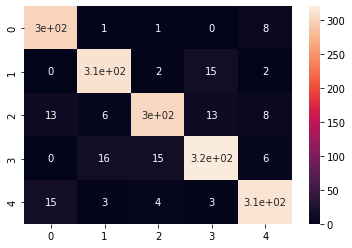

In [42]:
y_pred8=model8.predict(x_test)
y_pred28=np.argmax(y_pred8, axis=1)
y_test28=np.argmax(y_test_cat, axis=1)
cm=confusion_matrix(y_test28,y_pred28)
sns.heatmap(cm,annot=True)
print(classification_report(y_test28,y_pred28))

**Using neural network with tanh activation function**

---



In [43]:
conv_base9=InceptionV3(weights='imagenet',include_top=False,input_shape=(300,300,3))
model9=Sequential()
model9.add(conv_base9)
model9.add(GlobalAveragePooling2D())
model9.add(Dense(neurons,activation='tanh'))
#model9.add(Dense(4096,activation='relu'))
model9.add(Dense(5,activation='softmax'))
conv_base9.trainable=False

In [44]:
model9.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
history9=model9.fit(x_train,y_train_cat,epochs=e,validation_split=0.2)

Epoch 1/150
98/98 [==============================] - 10s 56ms/step - loss: 1.9052 - accuracy: 0.5105 - val_loss: 0.8498 - val_accuracy: 0.6505
Epoch 2/150
98/98 [==============================] - 3s 35ms/step - loss: 0.7156 - accuracy: 0.7312 - val_loss: 0.7446 - val_accuracy: 0.7156
Epoch 3/150
98/98 [==============================] - 4s 36ms/step - loss: 0.5878 - accuracy: 0.7733 - val_loss: 0.5847 - val_accuracy: 0.7653
Epoch 4/150
98/98 [==============================] - 3s 36ms/step - loss: 0.4475 - accuracy: 0.8377 - val_loss: 0.5287 - val_accuracy: 0.7997
Epoch 5/150
98/98 [==============================] - 3s 35ms/step - loss: 0.3781 - accuracy: 0.8549 - val_loss: 0.5207 - val_accuracy: 0.7934
Epoch 6/150
98/98 [==============================] - 3s 35ms/step - loss: 0.3550 - accuracy: 0.8673 - val_loss: 0.4962 - val_accuracy: 0.8278
Epoch 7/150
98/98 [==============================] - 3s 35ms/step - loss: 0.2844 - accuracy: 0.8964 - val_loss: 0.6135 - val_accuracy: 0.7806
Epoch

53/53 [==============================] - 3s 26ms/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       311
           1       0.93      0.95      0.94       331
           2       0.93      0.90      0.92       343
           3       0.92      0.89      0.91       357
           4       0.92      0.93      0.93       338

    accuracy                           0.93      1680
   macro avg       0.93      0.93      0.93      1680
weighted avg       0.93      0.93      0.93      1680



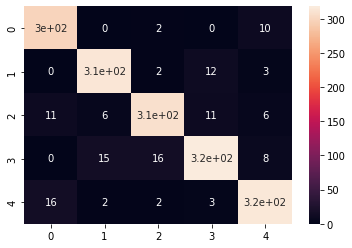

In [46]:
y_pred9=model9.predict(x_test)
y_pred29=np.argmax(y_pred9, axis=1)
y_test29=np.argmax(y_test_cat, axis=1)
cm=confusion_matrix(y_test29,y_pred29)
sns.heatmap(cm,annot=True) 
print(classification_report(y_test29,y_pred29))

**Using neural network with linear actiation function**

In [47]:
conv_base93=InceptionV3(weights='imagenet',include_top=False,input_shape=(300,300,3))
model93=Sequential()
model93.add(conv_base93)
model93.add(GlobalAveragePooling2D())
model93.add(Dense(neurons,activation='linear '))
#model93.add(Dense(4096,activation='relu'))
model93.add(Dense(5,activation='softmax'))
conv_base93.trainable=False

In [48]:
model93.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
history93=model93.fit(x_train,y_train_cat,epochs=e,validation_split=0.2)

Epoch 1/150
98/98 [==============================] - 10s 56ms/step - loss: 1.7028 - accuracy: 0.5542 - val_loss: 0.8165 - val_accuracy: 0.7079
Epoch 2/150
98/98 [==============================] - 3s 35ms/step - loss: 0.6679 - accuracy: 0.7312 - val_loss: 0.6456 - val_accuracy: 0.7462
Epoch 3/150
98/98 [==============================] - 3s 35ms/step - loss: 0.5952 - accuracy: 0.7659 - val_loss: 0.6107 - val_accuracy: 0.7653
Epoch 4/150
98/98 [==============================] - 3s 36ms/step - loss: 0.4890 - accuracy: 0.8074 - val_loss: 0.7803 - val_accuracy: 0.7385
Epoch 5/150
98/98 [==============================] - 3s 35ms/step - loss: 0.4219 - accuracy: 0.8447 - val_loss: 0.5539 - val_accuracy: 0.7959
Epoch 6/150
98/98 [==============================] - 3s 35ms/step - loss: 0.3540 - accuracy: 0.8724 - val_loss: 0.4302 - val_accuracy: 0.8316
Epoch 7/150
98/98 [==============================] - 3s 35ms/step - loss: 0.2852 - accuracy: 0.8909 - val_loss: 0.3795 - val_accuracy: 0.8584
Epoch

53/53 [==============================] - 3s 26ms/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       311
           1       0.94      0.95      0.95       331
           2       0.92      0.90      0.91       343
           3       0.93      0.90      0.92       357
           4       0.94      0.94      0.94       338

    accuracy                           0.93      1680
   macro avg       0.93      0.93      0.93      1680
weighted avg       0.93      0.93      0.93      1680



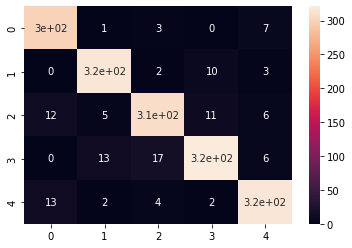

In [50]:
y_pred93=model93.predict(x_test)
y_pred293=np.argmax(y_pred93, axis=1)
y_test293=np.argmax(y_test_cat, axis=1)
cm=confusion_matrix(y_test293,y_pred293)
sns.heatmap(cm,annot=True) 
print(classification_report(y_test293,y_pred293))

In [52]:
conv_base_3=InceptionV3(weights='imagenet',include_top=False,input_shape=(300,300,3))
model_3=Sequential()
model_3.add(conv_base_3)
model_3.add(Flatten())
model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

x_train_3=model_3.predict(x_train)
x_test_3=model_3.predict(x_test)

pickle_out = open('/content/drive/MyDrive/x_train_3', 'wb')
pickle.dump(x_train_3, pickle_out)
pickle_out.close()

pickle_out = open('/content/drive/MyDrive/x_test_3', 'wb')
pickle.dump(x_test_3, pickle_out)
pickle_out.close()

53/53 [==============================] - 1s 27ms/step
